## Script to scan the PSSS photon energy

In [1]:
import epics as ep
import numpy as np
import matplotlib.pyplot as plt
from time import sleep
from collections import deque
%matplotlib inline
from IPython.display import clear_output, display

## User setup

In [4]:
PSSS_spectrum_name = 'SARFE10-PSSS059:SPECTRUM_Y'
PSSS_e_axis_name = 'SARFE10-PSSS059:SPECTRUM_X'
PSSS_cam_x_PV_name = 'SARFE10-PSSS059:MOTOR_X5.VAL'

PSSS_spectrum_PV = ep.PV(PSSS_spectrum_name)
PSSS_e_axis_PV = ep.PV(PSSS_e_axis_name)
PSSS_cam_x_PV = ep.PV(PSSS_cam_x_PV_name)

Cam_x_from = -20
Cam_x_to = -16
steps = 10
NumShots= 100

Cam_range = np.linspace(Cam_x_from, Cam_x_to, steps)

In [5]:
def set_PSSS_camera_x(pos):
    PSSS_cam_x_PV.put(pos, wait=True)
    

def PSSS_camera_x_scan(Energy_range, NumShots):
        
    Spectrum_scan = []
            
    for pos in Cam_range:
        set_PSSS_camera_x(pos)  
           
        Spectrum_this_energy = deque(maxlen = NumShots)
        def on_value_change(value=None,pv = None, **kwargs):
            Spectrum_this_energy.append(value)

            if len(Spectrum_this_energy) == NumShots:
                pv.clear_callbacks()
                
        PSSS_spectrum_PV.add_callback(callback=on_value_change, pv =PSSS_spectrum_PV)
        while len(Spectrum_this_energy) < NumShots:
            sleep(1)
        Spectrum_scan.append(np.array(Spectrum_this_energy))
        
    return(np.array(Spectrum_scan))
   

In [6]:
Scan_spec = PSSS_camera_x_scan(Cam_range,NumShots)

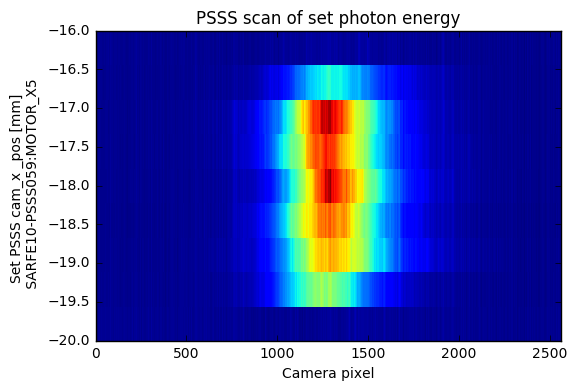

In [9]:
plt.figure()
plt.pcolormesh(np.arange(0,Scan_spec.shape[2]), Cam_range, Scan_spec.mean(axis=1))
plt.xlim([0,Scan_spec.shape[2]])
plt.title('PSSS scan of set photon energy')
plt.xlabel('Camera pixel')
plt.ylabel('Set PSSS cam_x _pos [mm] \n SARFE10-PSSS059:MOTOR_X5')